# Data set

#### 1. vendor name: 30 (adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec, dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson, microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry, sratus, wang) 
#### 2. Model Name: many unique symbols 
#### 3. MYCT: machine cycle time in nanoseconds (integer) 
#### 4. MMIN: minimum main memory in kilobytes (integer) 
#### 5. MMAX: maximum main memory in kilobytes (integer) 
#### 6. CACH: cache memory in kilobytes (integer) 
#### 7. CHMIN: minimum channels in units (integer) 
#### 8. CHMAX: maximum channels in units (integer) 
#### 9. PRP: published relative performance (integer) 

# Feature to predict = PRP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('machine.csv')[['myct','mmin','mmax','cach','chmin','chmax','prp']]
n=len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
myct     209 non-null int64
mmin     209 non-null int64
mmax     209 non-null int64
cach     209 non-null int64
chmin    209 non-null int64
chmax    209 non-null int64
prp      209 non-null int64
dtypes: int64(7)
memory usage: 11.5 KB


In [3]:
df['prp'].nunique()

116

In [4]:
#extracting feature
#deleting feature

df['avg_ch']=(df['chmin']+df['chmax'])/2
df['avg_mm']=(df['mmin']+df['mmax'])/2
df=df.drop(['mmin','mmax','chmin','chmax'],axis=1)

In [5]:
#Normalizatoin of data is done
normalized_df=(df-df.min())/(df.max()-df.min())

x1= normalized_df['myct'].values
x2= normalized_df['cach'].values
x3= normalized_df['avg_ch'].values
x4= normalized_df['avg_mm'].values
y= normalized_df['prp'].values

normalized_df.head(10)



,myct,cach,prp,avg_ch,avg_mm
0,0.072825,1.000,0.167832,0.765957,0.063919
1,0.008092,0.125,0.229895,0.212766,0.415888
2,0.008092,0.125,0.187063,0.212766,0.415888
3,0.008092,0.125,0.145105,0.212766,0.415888
4,0.008092,0.125,0.110140,0.127660,0.248999
5,0.006069,0.250,0.272727,0.212766,0.415888
6,0.004046,0.250,0.315559,0.255319,0.499332
7,0.004046,0.250,0.422203,0.255319,0.499332
8,0.004046,0.250,0.550699,0.255319,0.833111
9,0.004046,0.500,0.994755,0.510638,1.000000


# EDA

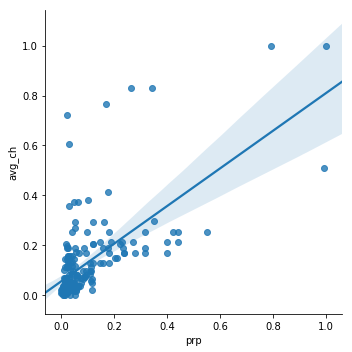

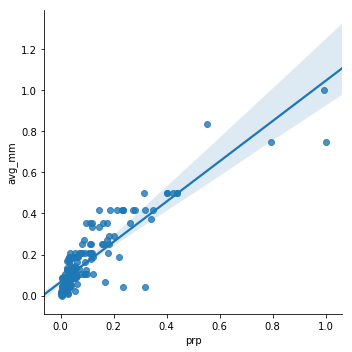

In [6]:
sns.lmplot(x='prp',y='avg_ch',data=normalized_df)
sns.lmplot(x='prp',y='avg_mm',data=normalized_df)

Text(0.5,0,'average main memory')

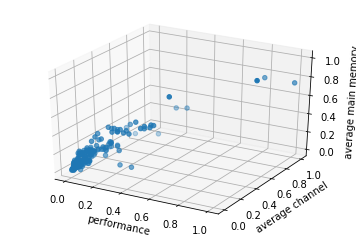

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y, x3, x4)
ax.set_xlabel('performance')
ax.set_ylabel('average channel')
ax.set_zlabel('average main memory')

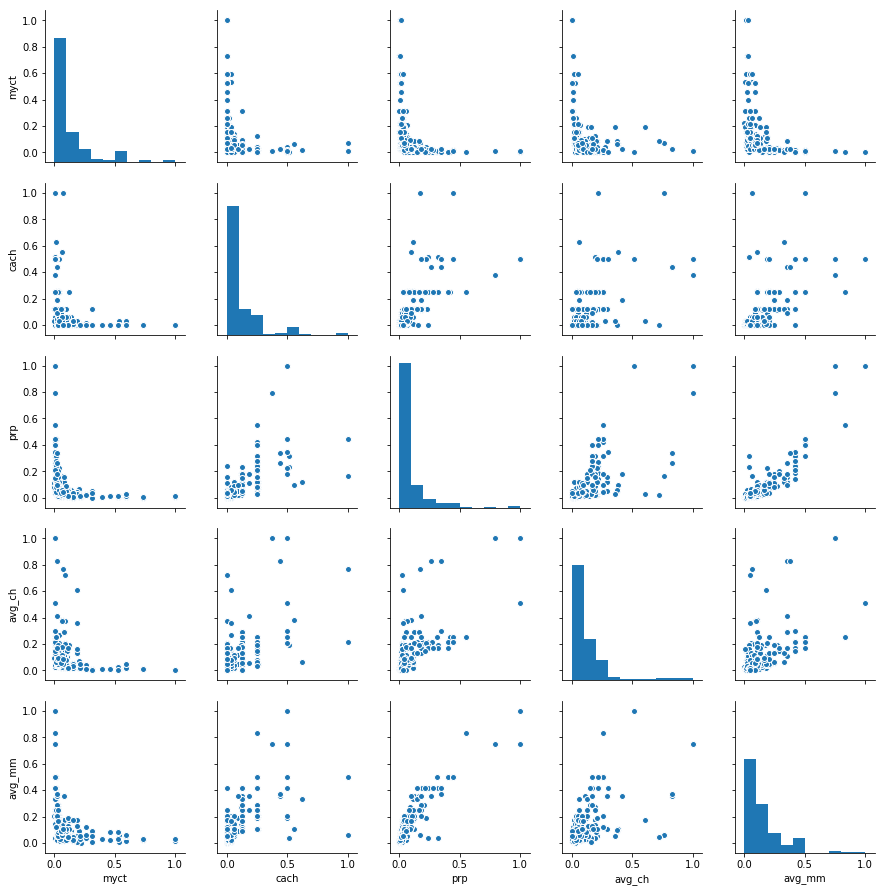

In [8]:
sns.pairplot(normalized_df)

# Modeling

In [9]:
alpha=0.001
x0=np.ones((n,1))
x_final=np.concatenate((x0,x1.reshape(n,1),x2.reshape(n,1),x3.reshape(n,1),x4.reshape(n,1)),axis=1)
beta= np.zeros((1,5))
#print(x_final.shape)
#print(beta.shape)

In [10]:
beta=np.random.rand(1,5)
for i in range(100000):
    y_pred=np.dot(x_final,beta.T)
    cost= np.sum((y_pred-y.reshape(n,1))**2)/n
    diff= (y_pred-y.reshape(n,1))
    derivative= 2*np.dot(diff.T,x_final)/n
    beta= (beta)-alpha*(derivative)
#print(beta)    
    

print(beta[:,1:])

print("Intercept: %.4f\n"% beta[0][0])

print("cost: %.4f\n"% cost)

[[0.06500596 0.18728527 0.17026852 0.6156261 ]]
Intercept: -0.0537

cost: 0.0029



# Comparing with sk learn

In [11]:
from sklearn import datasets,linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
y=y.reshape(n,1)
lm.fit(x_final[:,1:],y)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print("Mean squared error: %.2f"% mean_squared_error(y, y_pred))

Coefficients: 
 [[0.06384531 0.16235257 0.16618045 0.64354066]]
Intercept: 
 [-0.05482081]
Mean squared error: 0.00
